# ___SIMC 2.0 2024___

## Philippine Science High School - Main Campus
### Code Notebook

by: Hans Gabriel D. De Vera, Benjamin L. Jacob, Davis Nicholo A. Magpantay

\-----------------------------------------------

README:
- Kindly run this notebook from top-down

### Common import statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sklearn as sk

### Loading and profiling the data 

In [2]:
from os import system

# Loading the datasets for each task
loaded = np.load("endeavour.npz")
task1 = loaded["task1"]
task2 = loaded["task2"]
task3 = loaded["task3"]
task4 = loaded["task4"]
task6a = loaded["task6a"]
task6b = loaded["task6b"]
task7a = loaded["task7a"]
task7b = loaded["task7b"]

# Noting the datasets' shapes
print("Data Shapes:")
print(f"task1: {task1.shape}")
print(f"task2: {task2.shape}")
print(f"task3: {task3.shape}")
print(f"task4: {task4.shape}")
print(f"task6a: {task6a.shape}")
print(f"task6b: {task6b.shape}")
print(f"task7a: {task7a.shape}")
print(f"task7b: {task7b.shape}")

print()

# Noting the datasets' range for Tasks 6 & 7
print("Data Ranges:")
print(f'task6a: [{min(task6a)}, {max(task6a)}]') # Indicates that task6a data represents pattern numbers/IDs
print(f'task6b: [{min(task6b)}, {max(task6b)}]') # Indicates that task6b data represents pattern pixels
print(f'task7a: [{min(task7a)}, {max(task7a)}]') # Indicates that task7a data represents pattern numbers/IDs
print(f'task7b: [{min(task7b)}, {max(task7b)}]') # Indicates that task7b data represents pattern pixels

Data Shapes:
task1: (25, 18, 18)
task2: (100, 1296)
task3: (1000, 1089)
task4: (1000, 2500)
task6a: (1556153,)
task6b: (1556153,)
task7a: (2737941,)
task7b: (2737941,)

Data Ranges:
task6a: [0, 65534]
task6b: [0, 624]
task7a: [0, 99999]
task7b: [0, 624]


## **Task 1: Classifying a few noiseless patterns**

Our approach to Task 1 (until Task 3) is motivated by the perfect noiseless property of the provided data. Since all patterns under a specific orientation class would be identical, we can simply use a hash-lookup algorithm. That is, we provide a hash or "identification code" to an orientation class based on its reference pattern, then classify all patterns that results in the same hash under that class.

### (1a) Plotting the four reference rotations

In [3]:
### Function to generate the rotations of the reference pattern ("ref_pattern")
def reference_rotations(ref_pattern):
    deg270 = np.rot90(ref_pattern) # Note: np.rot90 rotates anti-clockwise
    deg180 = np.rot90(deg270)
    deg90 = np.rot90(deg180)

    return [ref_pattern, deg90, deg180, deg270]

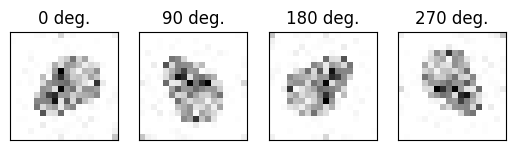

In [4]:
ref_rotations = reference_rotations(task1[0]) # Rotate the first image in the data, which is the reference pattern

### Generating the figure for Task 1a
task1a_fig = plt.figure()
task1a_axes = task1a_fig.subplots(1, 4)
for ax, rotated_image in zip(task1a_axes, ref_rotations):
    ax.imshow(rotated_image, cmap="Greys")

    # Settings for output figure clarity
    ax.xaxis.set_major_locator(ticker.NullLocator()) # Remove axes
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.set_title(str([0, 90, 180, 270][task1a_axes.tolist().index(ax)]) + " deg.") # Add subplot title

### (1b) Identify and list the patterns in each orientation class

This is where the "hash then lookup" part of our approach takes place.

This first block of code generates the reference hashes. This is done via a method known as prime hashing.

In [5]:
### Precomputing powers of two for more efficient prime hashing
pow_2 = [1]
P_mod = (10 ** 9) + 7
for i in range(200000):
    pow_2.append((pow_2[-1] << 1) % P_mod)

### Hashing function for patterns ('img' is a multidimensional pattern,
### so passing the 2D representation or 1D flattened version would both work)
def hash_img(img):
    img_flattened = img.flatten()
    flat_len = img_flattened.shape[0]
    
    return np.dot(img_flattened, pow_2[:flat_len]) % P_mod

### Generating the reference hashes of the four rotation/orientation classes
def t1_gen_rot_lookup(rotations):
    return dict([(hash_img(rotations[i]), [0, 90, 180, 270][i]) for i in range(4)])

t1_rotation_lookup = t1_gen_rot_lookup(ref_rotations)
t1_output_list = {0: 0, 90: 0, 180: 0, 270: 0} # Stores the count under each orientation class

for t1_img in task1:
    img_hash = hash_img(t1_img)    
    t1_output_list[t1_rotation_lookup[img_hash]] += 1


### Printing the answers
print("Reference hash for each orientation class:")
for hash in t1_rotation_lookup:
    print(f'{t1_rotation_lookup[hash]} deg : {hash}')

print()

print("Count for each orientation class")
for rot_class in t1_output_list:
    print(f'{rot_class} deg : {t1_output_list[rot_class]} patterns')


Reference hash for each orientation class:
0 deg : 240650399
90 deg : 458621916
180 deg : 967870281
270 deg : 747319434

Count for each orientation class
0 deg : 6 patterns
90 deg : 10 patterns
180 deg : 6 patterns
270 deg : 3 patterns


Here, we provide a colorful visualization for Task 1b:

/var/folders/6f/mw99m_hd0zn5zlxhml8958740000gp/T/ipykernel_5984/1869720962.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  task1b_fig.show()


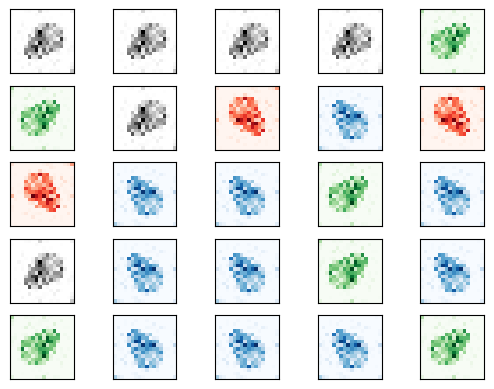

In [6]:
### Utility function for easily plotting and coloring the patterns with their identified orientation classifications
def plot_classified_patterns(fig_num, nr, nc, rotation_lookup, data_set):
    task1b_fig = plt.figure(fig_num)
    fig_axes = task1b_fig.subplots(nr, nc)
    fig_cmap = {0: "Grays", 90: "Blues", 180: "Greens", 270: "Reds"}
    for ax, img in zip(np.concatenate(fig_axes), data_set):
        ax.imshow(img, cmap=fig_cmap[rotation_lookup[hash_img(img)]])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    task1b_fig.show()

plot_classified_patterns(2, 5, 5, t1_rotation_lookup, task1)

Each image is colored according to its orientation classification:
- Gray = 0 deg.
- Blue = 90 deg.
- Green = 180 deg.
- Red = 270 deg.

# **Task 2: Flattening 2D patterns into 1D representations**

### (2a) Rendering the 2D master image from flattened data

This task can be done by reshaping the 1D data into a 2D numpy array with dimensions 36 x 36 (as stated in the problem).

/var/folders/6f/mw99m_hd0zn5zlxhml8958740000gp/T/ipykernel_5984/745525678.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  t2a_fig.show()


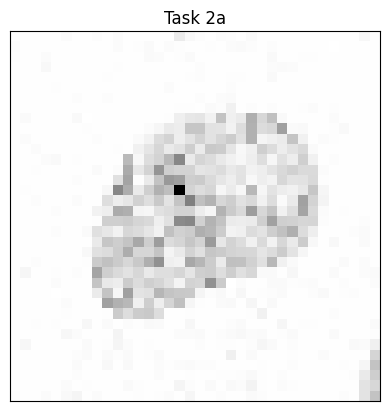

In [7]:
t2a_reshaped = np.reshape(task2, newshape=(100, 36, 36))

t2a_fig = plt.figure()
plt.imshow(t2a_reshaped[0], cmap = "Grays")

# Settings for figure clarity
plt.title("Task 2a")
plt.xticks([])
plt.yticks([])
t2a_fig.show()

### (2b) Listing patterns in each of the four orientations

We used a similar method as to Task 1. This shows that our hashing algorithm is already scaleable to hundreds of patterns.

In [8]:
### Generating reference rotation hashes
t2_ref_rotations = reference_rotations(t2a_reshaped[0]) # We rotate the reference image from Task 2a
t2_rotation_lookup = t1_gen_rot_lookup(t2_ref_rotations)
t2_flattened_rotation_lookup = t1_gen_rot_lookup(np.reshape(t2_ref_rotations, newshape=(4, 1296)))

### Classifying each pattern 
t2_output_list = {0: 0, 90: 0, 180: 0, 270: 0}
for t2_img in task2:
    img_hash = hash_img(t2_img)    
    t2_output_list[t2_rotation_lookup[img_hash]] += 1

### Printing the list of pattern counts
print("Count for each orientation class")
for rot_class in t2_output_list:
    print(f'{rot_class} deg : {t2_output_list[rot_class]} patterns')

Count for each orientation class
0 deg : 22 patterns
90 deg : 32 patterns
180 deg : 21 patterns
270 deg : 25 patterns


Similar to Task 1b, we also provide a visualization of these classifications:

/var/folders/6f/mw99m_hd0zn5zlxhml8958740000gp/T/ipykernel_5984/1869720962.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  task1b_fig.show()


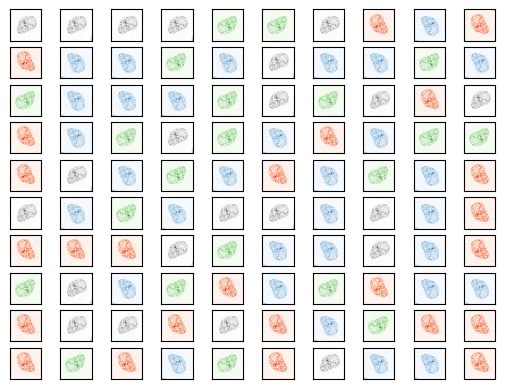

In [9]:
plot_classified_patterns(4, 10, 10, t2_rotation_lookup, np.reshape(task2, newshape=(100, 36, 36)))

Each image is colored according to its orientation classification:
- Gray = 0 deg.
- Blue = 90 deg.
- Green = 180 deg.
- Red = 270 deg.

### (2-Extra 1) Plotting the Task 2 design matrix and its sorted version

Here, we show the classification by comparing the sorted and unsorted design matrix of Task 2:

/var/folders/6f/mw99m_hd0zn5zlxhml8958740000gp/T/ipykernel_5984/1464815357.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  wrapper.show()


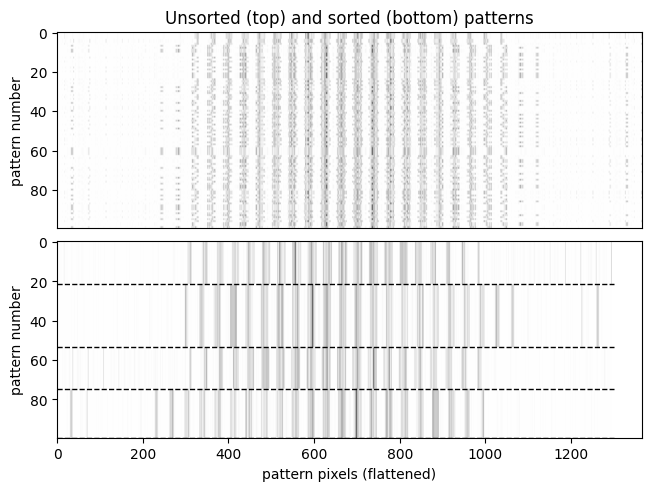

In [10]:
wrapper, (ax_raw, ax_sorted) = plt.subplots(2, 1, sharey=True, layout="compressed")

### Showing the unsorted patterns (original)
ax_raw.imshow(task2, cmap="Grays", aspect="auto")

### Showing the sorted patterns (after classification)
t2_classifications = [t2_flattened_rotation_lookup[hash_img(img)] for img in task2]
_, t2_rot_counts = np.unique(t2_classifications, return_counts=True)
t2_rot_counts_pref_sum = np.add.accumulate(t2_rot_counts)
t2_sorted = task2[np.argsort(t2_classifications)]
ax_sorted.imshow(t2_sorted, cmap="Grays", aspect="auto")

### Settings for plot clarity
ax_raw.set_title("Unsorted (top) and sorted (bottom) patterns")
ax_raw.set_ylabel("pattern number")
ax_raw.get_xaxis().set_visible(False)
ax_raw.set_ylabel("pattern number")
ax_sorted.set_ylabel("pattern number")
ax_sorted.set_xlabel("pattern pixels (flattened)")
ax_sorted.axes.hlines(y=t2_rot_counts_pref_sum - 0.5, xmin=0.0 - 0.5, xmax=1300, color="black", linestyle="--", linewidth=1)

wrapper.show()

# **Task 3: Scaling up to thousands of patterns**

### (3a) Rendering the master image

We find the original 2D shape of the image by guessing one of its sides by looking into the factors of the length of the flattened data (i.e., 1089)

/var/folders/6f/mw99m_hd0zn5zlxhml8958740000gp/T/ipykernel_5984/1176706807.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  t3a_fig.show()


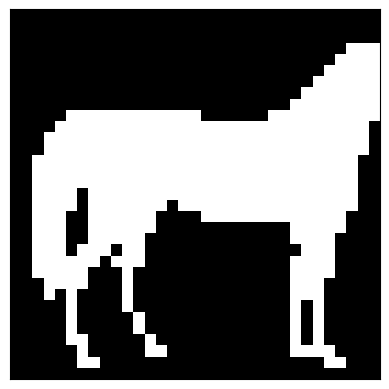

In [11]:
### We guess one of the dimensions of the array, then reshape the design matrix
side_length = 33 #33 is correct -> "it's a horse" (Jacob, 2024)
t3_reshaped = np.reshape(task3, newshape=(1000, side_length, 1089//side_length))

t3a_fig = plt.figure()
plt.imshow(t3_reshaped[0], cmap = "Grays") # We show the first pattern, which is the master image
plt.xticks([])
plt.yticks([])
t3a_fig.show()

**This is a horse! So, we know our guess is correct :)**

### (3b) Listing the number of patterns under each orientation class

We used the same classification algorithm for noiseless data described in Tasks 1-2. Even at thousands of patterns, our algorithm remains fast and resilient. 

In [12]:
### Generating the reference rotation hashes
t3_ref_rotations = reference_rotations(t3_reshaped[0])
t3_rotation_lookup = t1_gen_rot_lookup(t3_ref_rotations)
t3_flattened_rotation_lookup = t1_gen_rot_lookup(np.reshape(t3_ref_rotations, newshape=(4, 1089)))

### Classifying the patterns
t3_output_list = {0: 0, 90: 0, 180: 0, 270: 0}
for t3_img in task3:
    img_hash = hash_img(t3_img)    
    t3_output_list[t3_rotation_lookup[img_hash]] += 1

### Printing the list of pattern counts
print("Count for each orientation class")
for rot_class in t3_output_list:
    print(f'{rot_class} deg : {t3_output_list[rot_class]} patterns')

Count for each orientation class
0 deg : 254 patterns
90 deg : 236 patterns
180 deg : 250 patterns
270 deg : 260 patterns


### (3c) Visualizing sorted and unsorted design matrices

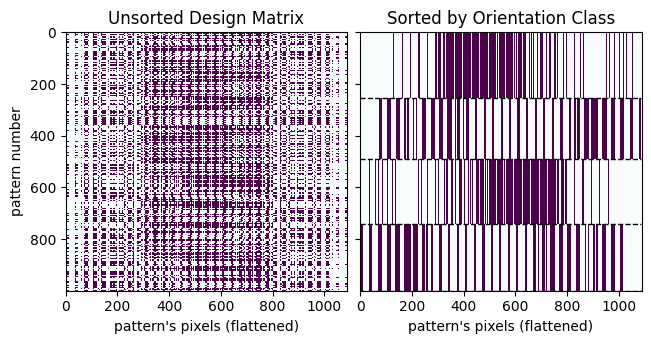

<Figure size 640x480 with 0 Axes>

In [13]:
wrapper, (ax_raw, ax_sorted) = plt.subplots(1, 2, sharey=True, layout="compressed")

### Plotting the unsorted/original design matrix
ax_raw.matshow(task3, cmap="BuPu_r")

### Plotting the sorted design matrix (after hash-lookup classification)
t3_classifications = [t3_flattened_rotation_lookup[hash_img(img)] for img in task3]
_, t3_rot_counts = np.unique(t3_classifications, return_counts=True)
t3_rot_counts_pref_sum = np.add.accumulate(t3_rot_counts)
t3_sorted = task3[np.argsort(t3_classifications)]
t3_sorted_design_matrix = plt.figure(6)
ax_sorted.matshow(t3_sorted, cmap="BuPu_r")

### Settings for figure clarity
ax_raw.tick_params(top=False, bottom=True, labelbottom=True, labeltop=False)
ax_raw.set_title("Unsorted Design Matrix")
ax_sorted.tick_params(top=False, bottom=True, labelbottom=True, labeltop=False)
ax_sorted.axes.hlines(y=t3_rot_counts_pref_sum - 0.5, xmin=0.0 - 0.5, xmax=1085, color="black", linestyle="--", linewidth=1)
ax_sorted.set_title("Sorted by Orientation Class")
ax_raw.set_xlabel("pattern's pixels (flattened)")
ax_raw.set_ylabel("pattern number")
ax_sorted.set_xlabel("pattern's pixels (flattened)")

plt.show()

# **Task 4: Noisy Patterns**

### Profiling the Task4 data

Task4 shape: (1000, 2500)


<Figure size 640x480 with 0 Axes>

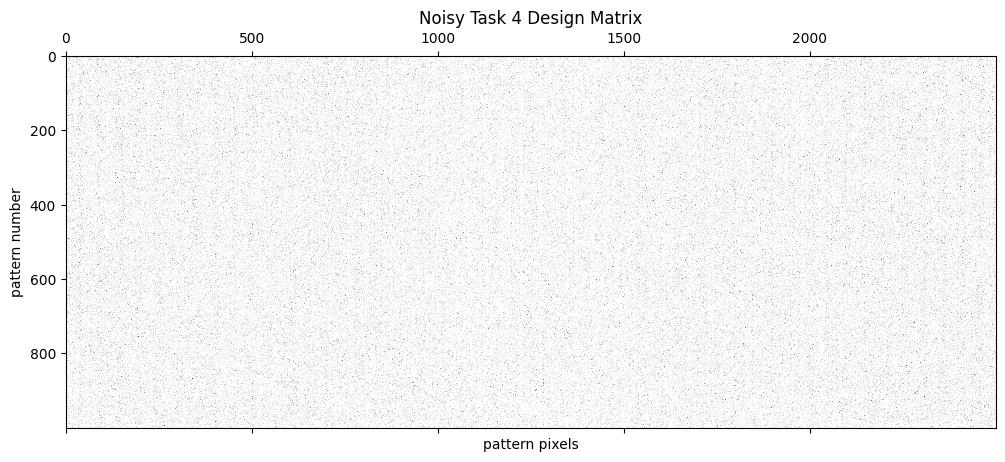

In [14]:
### Shape
print(f'Task4 shape: {task4.shape}')

# Design Matrix
t4_design_matrix = plt.figure()
t4_design_matrix.align_labels()
t4_design_matrix_plot = plt.matshow(task4, cmap="Grays")
ax = t4_design_matrix_plot.axes
plt.title("Noisy Task 4 Design Matrix")
ax.set_ylabel("pattern number")
ax.set_xlabel("pattern pixels")
plt.show()

### (4a) Average Row-Sum of Noisy Design Matrix

We compute the average pixel value across the entire design matrix.

In [15]:
### TASK 4A ###
task4a_answer = task4.sum(axis=1).mean()
print(f'Task 4a (average row-sum): {task4a_answer}')

Task 4a (average row-sum): 1251.047


### (4b) Rendered 2D Image of Noisy Design Matrix Average

We average all rows of the design matrix to arrive at the rendered 2D image if we assume all patterns correspond to the same orientation class (which, of course, is not true).

<Figure size 640x480 with 0 Axes>

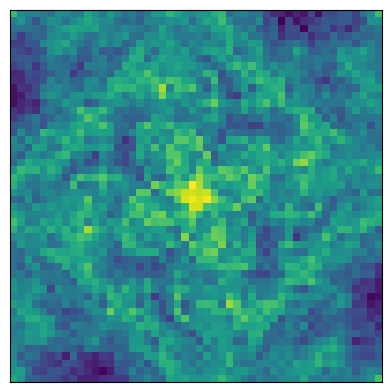

In [16]:
import matplotlib.ticker as ticker

### TASK 4B ###

# Generating the average image by getting the mean of the design matrix, then reshaping to 50x50
summed_img = np.mean(task4, axis=0)
summed_img_reshaped = np.reshape(summed_img,newshape=(50,50))

# Showing the image
task4b_fig = plt.figure(8)
task4b_fig.align_labels()
task4b_fig_plot = plt.matshow(summed_img_reshaped, cmap="viridis_r")
ax = task4b_fig_plot.axes
# plt.title("Mean Task4 Design Matrix")
ax.set_ylabel("")
ax.set_xlabel("")
ax.xaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_major_locator(ticker.NullLocator())
plt.show()

Notice the **approximate four-fold symmetry**. This suggests that we can have 4 clusters in our k-means implementation!

### (4c) Rendered images of four orientation classes via k-means clustering 

We first perform k-means clusteringo on the noisy design matrix:

In [17]:
from sklearn.cluster import KMeans
from math import floor

### K-means hyperparameters
K = 4
N_init = 10

### K-means classifer
k_means_classifier = KMeans(n_clusters = 4, n_init=N_init)
t4_res = k_means_classifier.fit_predict(task4)
t4_data_order = np.argsort(t4_res) # Argsort!
t4_data_sorted = task4[t4_data_order] # Apply permutation to the array
_, t4_res_count = np.unique(t4_res, return_counts=True)

Then, we generate the mean images from each orientation class:

/var/folders/6f/mw99m_hd0zn5zlxhml8958740000gp/T/ipykernel_5984/1658402895.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  t4c_fig.show()


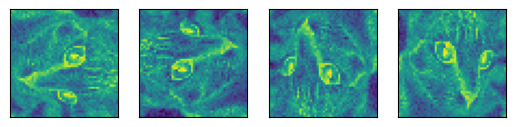

In [18]:
# Segregating images by orientation classes into a dict
t4_classified_imgs = dict({0: [], 1: [], 2: [], 3: []})

for img, img_label in zip(task4, t4_res):
    t4_classified_imgs[img_label].append(img)

t4c_fig = plt.figure()
t4c_axes = t4c_fig.subplots(1, 4)
for ax, t4_classified_img_class in zip(t4c_axes, t4_classified_imgs.values()):
    t4_mean_img = np.mean(np.array(t4_classified_img_class), axis=0)
    ax.imshow(np.reshape(t4_mean_img, newshape=(50, 50)), cmap="viridis_r")
    ax.xaxis.set_major_locator(ticker.NullLocator())
    ax.yaxis.set_major_locator(ticker.NullLocator())

t4c_fig.show()

**This shows a cat!** This suggests that our clustering has been successful!

# **Task 5: Likelihood to succeed with noisy patterns**

This task mainly involved analytical derivations. However, we provide a visual support to our result in Task (5f).

### Visualizing our Task (5f) expression

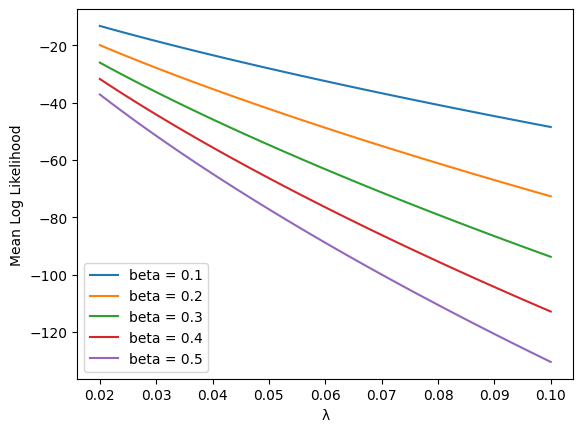

In [19]:
from math import log
import numpy as np
import matplotlib.pyplot as plt

def alignment(l, b, M=50, N=625):
    return M * (l * log(l) + (1 - l) * log(1 - l)) + \
            (N - M) * (b * l * log(b * l) + (1 - b * l) * log(1 - b * l))

BETA = [0.1, 0.2, 0.3, 0.4, 0.5]

for b in BETA:
    l_values = np.linspace(0.02, 0.10)
    l_values = l_values.tolist()
    b_values = []

    for l in l_values:
        b_values.append(alignment(l, b))

    plt.plot(l_values, b_values, label=f'beta = {b}')
    plt.xlabel("λ")
    plt.ylabel("Mean Log Likelihood")
    
plt.legend()
plt.show()

The graph matches the trend shown in Figure 10 of the Problem Statement. This suggests that our expression for average log-likelihood is correct.

# **Task 6: Scaling up with sparse data format**

### (6a) Average pixel value on sparse data

We transform the task6a and task6b into a sparse representation via scipy coo_array:

In [20]:
from scipy.sparse import coo_array

### Generate the sparse array from the sparse data 'task6a' and 'task6b'
t6_sparse_array = coo_array((np.ones_like(task6a), (task6a, task6b)))
t6a_answer = t6_sparse_array.sum(axis=1).mean()
print(f'Task 6a: {t6a_answer}')

Task 6a: 23.745372701609828


### (6b) Generating average image of sparse data

<Figure size 640x480 with 0 Axes>

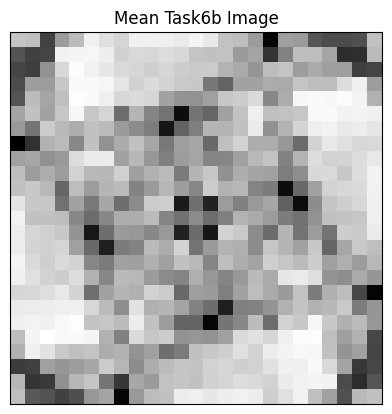

In [21]:
### Getting the mean image from the sparse representation
t6b_avg_img = t6_sparse_array.mean(axis=0)
t6b_fig = plt.figure()
t6b_fig.align_labels()
t6b_plot = plt.matshow(np.reshape(t6b_avg_img, newshape = (25, 25)), cmap="Grays")

### Settings for clarity
ax = t6b_plot.axes
ax.xaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_major_locator(ticker.NullLocator())
plt.title("Mean Task6b Image")
ax.set_ylabel("")
ax.set_xlabel("")
plt.show()

### (6c) K-means clustering on sparse data

/var/folders/6f/mw99m_hd0zn5zlxhml8958740000gp/T/ipykernel_5984/1704865802.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  t6c_fig.show()


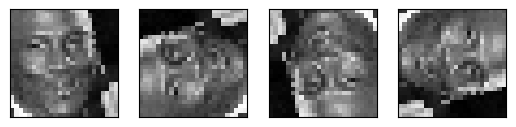

In [22]:
from sklearn.cluster import KMeans
from math import floor

### K-means hyperparameters
K = 4
N_init = 10

### K-means classifer
t6_k_means_classifier = KMeans(n_clusters = 4, n_init=N_init)
t6c_res = t6_k_means_classifier.fit_predict(t6_sparse_array)
t6c_data_order = np.argsort(t6c_res)
_, t6c_res_count = np.unique(t6c_res, return_counts=True)

### Segregating patterns by orientation classes into a dict
t6c_fig = plt.figure()
t6c_axes = t6c_fig.subplots(1, 4)
for ax, t6_cluster_center in zip(t6c_axes, t6_k_means_classifier.cluster_centers_):
    ax.imshow(-np.reshape(t6_cluster_center, newshape=(25, 25)), cmap="Grays")
    ax.xaxis.set_major_locator(ticker.NullLocator())
    ax.yaxis.set_major_locator(ticker.NullLocator())

t6c_fig.show()

**This is a person! (but we don't know who HAHA)**. This also suggests that our sparse implementation of k-means has been successful.

# **Task 7: Sharing data amongst orientations**

This is the final task! We have an even larger dataset of noisy data, so we utilize the sparse implementation of k-means. However,from testing, we had to modify it (which we described in our report).

### Turning the data into sparse representation

In [23]:
from scipy.sparse import coo_array

### Loading the task 7 data into a coordinate block matrix 
t7_sparse_array = coo_array((np.ones_like(task7a), (task7a, task7b)))
# print(t7_sparse_array) # Comment out to show the sparse array

### Profiling the data

This helped us understand how to move forward in extracting the master image.

Task7 average pixel value: 27.37941
Histogram of pixel values in Task 7 data:


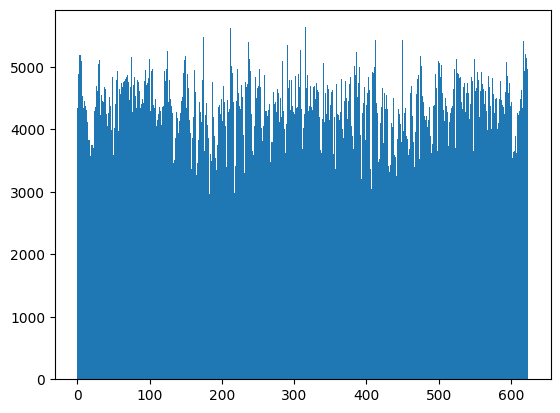

In [24]:
# Getting the average pixel value
print(f'Task7 average pixel value: {t7_sparse_array.sum(axis=1).mean()}')

# Plotting a histogram of different pixel values 
print("Histogram of pixel values in Task 7 data:")
plt.hist(task7b, bins=625)
plt.show()

### Rendering the mean image of the sparse array

<Figure size 640x480 with 0 Axes>

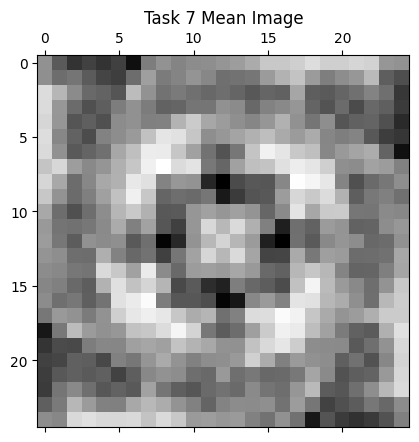

In [25]:
from scipy.sparse import coo_array

t7_avg_img = t7_sparse_array.mean(axis=0)
fig13 = plt.figure(13)
fig13.align_labels()
fig13_plot = plt.matshow(np.reshape(t7_avg_img, newshape = (25, 25)), cmap="Grays")
ax = fig13_plot.axes
plt.title("Task 7 Mean Image")
ax.set_ylabel("")
ax.set_xlabel("")
plt.show()



### Modified K-means Clustering

Our modifications involved iteratively running k-means with better and better "seeds". These seeds are picked to maximize the entropy of the initial means. For details, please consult our report.

Note: This takes ~50s to execute with 10 iterations.

/var/folders/6f/mw99m_hd0zn5zlxhml8958740000gp/T/ipykernel_5984/3420657429.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig15.show()


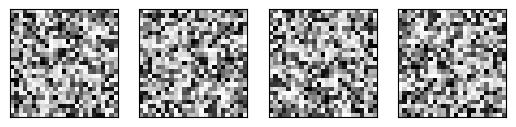

/var/folders/6f/mw99m_hd0zn5zlxhml8958740000gp/T/ipykernel_5984/3420657429.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig15.show()


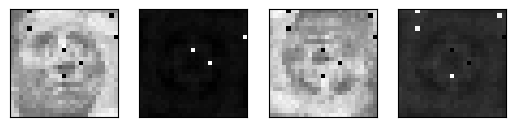

/var/folders/6f/mw99m_hd0zn5zlxhml8958740000gp/T/ipykernel_5984/3420657429.py:47: RuntimeWarning: divide by zero encountered in log2
  new_master_image = t7_centers[np.argmax(-(t7_centers * np.log2(t7_centers) + (1 - t7_centers) * np.log2(1 - t7_centers)).sum(axis=1))]
/var/folders/6f/mw99m_hd0zn5zlxhml8958740000gp/T/ipykernel_5984/3420657429.py:47: RuntimeWarning: invalid value encountered in multiply
  new_master_image = t7_centers[np.argmax(-(t7_centers * np.log2(t7_centers) + (1 - t7_centers) * np.log2(1 - t7_centers)).sum(axis=1))]
/var/folders/6f/mw99m_hd0zn5zlxhml8958740000gp/T/ipykernel_5984/3420657429.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig15.show()


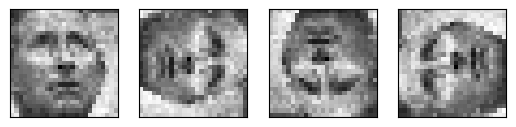

/var/folders/6f/mw99m_hd0zn5zlxhml8958740000gp/T/ipykernel_5984/3420657429.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig15.show()


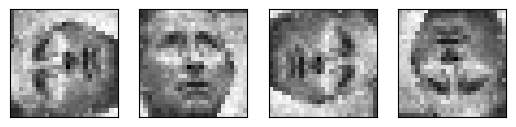

/var/folders/6f/mw99m_hd0zn5zlxhml8958740000gp/T/ipykernel_5984/3420657429.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig15.show()


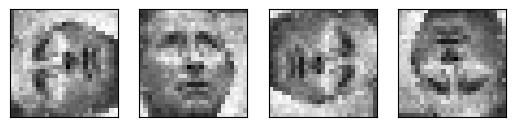

/var/folders/6f/mw99m_hd0zn5zlxhml8958740000gp/T/ipykernel_5984/3420657429.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig15.show()


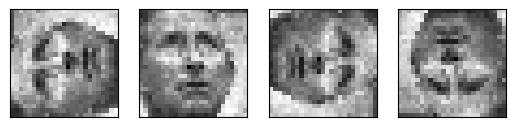

/var/folders/6f/mw99m_hd0zn5zlxhml8958740000gp/T/ipykernel_5984/3420657429.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig15.show()


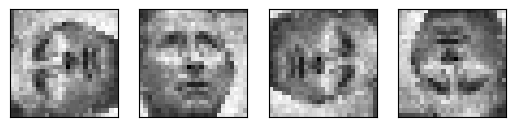

/var/folders/6f/mw99m_hd0zn5zlxhml8958740000gp/T/ipykernel_5984/3420657429.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig15.show()


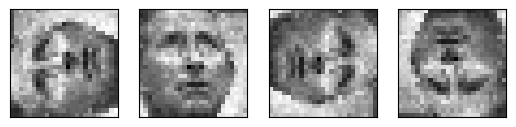

/var/folders/6f/mw99m_hd0zn5zlxhml8958740000gp/T/ipykernel_5984/3420657429.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig15.show()


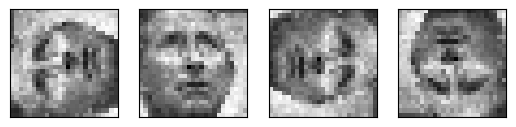

/var/folders/6f/mw99m_hd0zn5zlxhml8958740000gp/T/ipykernel_5984/3420657429.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig15.show()


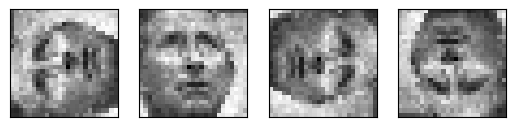

/var/folders/6f/mw99m_hd0zn5zlxhml8958740000gp/T/ipykernel_5984/3420657429.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig15.show()


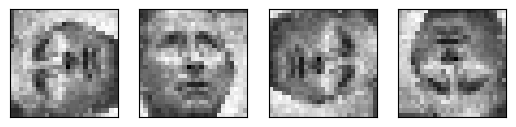

In [27]:
# K-means Clustering
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans
from math import floor
from scipy.sparse import coo_matrix, csr_matrix
from sklearn.preprocessing import normalize
from numpy.random import random

# Generating a Random Seed
t7_init_random_master = random(size=(25, 25))
t7_init_seed_unreshaped = np.concatenate(reference_rotations(t7_init_random_master))
t7_init_seed = np.reshape(t7_init_seed_unreshaped, newshape=(4, 625))

# Looping the K-means Classifier Until Convergence
plt.ion()
# Plotting the Initial Means
fig15 = plt.figure(15)
fig15_axes = fig15.subplots(1, K)
for ax, t7_cluster_center in zip(fig15_axes, t7_init_seed):
    ax.imshow(-np.reshape(t7_cluster_center, newshape=(25, 25)), cmap="Grays")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
fig15.show()
plt.pause(0.001)

t7_centers = None
for i in range(10):
    # Running K-means
    K = 4
    t7_k_means_classifier = KMeans(n_clusters = K, init=t7_init_seed)
    t7c_res = t7_k_means_classifier.fit_predict(t7_sparse_array.todok())
    t7c_data_order = np.argsort(t7c_res)
    _, t7c_res_count = np.unique(t7c_res, return_counts=True)

    # Plotting the Means of the Clusters
    fig15 = plt.figure(15)
    fig15_axes = fig15.subplots(1, K)
    for ax, t7_cluster_center in zip(fig15_axes, t7_k_means_classifier.cluster_centers_):
        ax.imshow(-np.reshape(t7_cluster_center, newshape=(25, 25)), cmap="Grays")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    fig15.show()
    plt.pause(0.001)

    # Picking the group with the highest entropy as the new candidate master image
    t7_centers = t7_k_means_classifier.cluster_centers_
    new_master_image = t7_centers[np.argmax(-(t7_centers * np.log2(t7_centers) + (1 - t7_centers) * np.log2(1 - t7_centers)).sum(axis=1))]
    t7_init_seed = np.reshape(np.concatenate(reference_rotations(np.reshape(new_master_image, newshape=(25, 25)))), newshape=(4, 625))

### Sharing data across the orientations classes

So far, we have four noisy images for each orientation classes (t7_centers). To collate them into a single master image, we need to share data amongst the four classes by aligning them, then getting the mean image.

To automate the aligning, we used our reference_rotations() function from Task 1 to generate a list of all the rotations for each of the orientation classes centers generated from the k-means. We assume the first center generated from the modified k-means to be 0 deg. rotation (base_center). We iterate through each rotation of all centers then calculate the cosine similarity with respect to the base_center. The rotation with the highest similarity is the amount of turns needed for one of the other centers to be aligned with the base_center.

We then rotate each center to align with the base_center, then find their average image--resulting in the master image!

/var/folders/6f/mw99m_hd0zn5zlxhml8958740000gp/T/ipykernel_5984/1011907898.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  t7_last_fig.show()


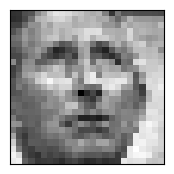

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

### Defining the base_center
base_center = t7_centers[0]
aligned = []

### Realigning each center
for orientation in t7_centers:
    rot_orientation = orientation
    cossim_list = [cosine_similarity(base_center.reshape(1,-1), rotation.reshape(1,-1)) for rotation in reference_rotations(rot_orientation.reshape(25,25))][::-1]
    best_alignment_turns = cossim_list.index(max(cossim_list))
    for i in range(best_alignment_turns):
        rot_orientation = np.rot90(rot_orientation.reshape(25,25)).flatten()
    aligned.append(rot_orientation)

oriented_centers = np.array(aligned)
master_image = oriented_centers.mean(axis=0)

### Showing the master image
t7_last_fig = plt.figure(figsize=(2,2))
t7_last_axes = t7_last_fig.subplots(1, 1)
t7_last_axes.imshow(-master_image.reshape(25,25), cmap="Grays")

t7_last_axes.xaxis.set_major_locator(ticker.NullLocator())
t7_last_axes.yaxis.set_major_locator(ticker.NullLocator())
t7_last_fig.show()



### **^^ Our master image for Task 7^^** 

### _(Informal) Footnotes_
- This has been a very fun challenge :D - SIMC04